<a href="https://colab.research.google.com/github/Fabian-LG/RedNeuronal-prediccion/blob/main/WineQuality_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['Fixed Acidity', 'Volatile Acidity', 'Citric Acid', 'Residual sugar', 'Chlorides',
                'Free sulfur dioxide', 'Total sulfur dioxide', 'Density', 'pH', 'Sulphates', 'Alochol', 'Quality']

raw_dataset = pd.read_csv('vino.csv', skiprows=[0], names=column_names,
                          na_values='?', comment='\t',
                          sep=';', skipinitialspace=True)

In [ ]:
dataset = raw_dataset.copy()
dataset.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alochol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset.isna().sum()

Fixed Acidity           0
Volatile Acidity        0
Citric Acid             0
Residual sugar          0
Chlorides               0
Free sulfur dioxide     0
Total sulfur dioxide    0
Density                 0
pH                      0
Sulphates               0
Alochol                 0
Quality                 0
dtype: int64

In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fixed Acidity,1279.0,8.310164,1.744190,4.60000,7.1000,7.90000,9.250000,15.9000
Volatile Acidity,1279.0,0.525571,0.176645,0.12000,0.3900,0.52000,0.635000,1.5800
Citric Acid,1279.0,0.271618,0.196822,0.00000,0.0900,0.26000,0.430000,0.7900
Residual sugar,1279.0,2.516341,1.300985,0.90000,1.9000,2.20000,2.600000,13.9000
Chlorides,1279.0,0.087347,0.045666,0.01200,0.0710,0.07900,0.091000,0.6110
Free sulfur dioxide,1279.0,15.868647,10.438880,1.00000,7.0000,14.00000,21.000000,72.0000
Total sulfur dioxide,1279.0,46.488663,32.952841,6.00000,22.0000,38.00000,62.000000,289.0000
Density,1279.0,0.996739,0.001888,0.99007,0.9956,0.99676,0.997855,1.0032
pH,1279.0,3.312588,0.153923,2.87000,3.2100,3.31000,3.400000,4.0100
Sulphates,1279.0,0.655012,0.160192,0.33000,0.5500,0.62000,0.730000,1.9800


In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Quality')
test_labels = test_features.pop('Quality')

In [ ]:
train_labels

1109    6
1032    5
1002    7
487     6
979     5
       ..
281     7
932     6
732     5
715     6
832     3
Name: Quality, Length: 1279, dtype: int64

In [ ]:
train_features

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alochol
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0
979,12.2,0.450,0.49,1.40,0.075,3.0,6.0,0.99690,3.13,0.63,10.4
...,...,...,...,...,...,...,...,...,...,...,...
281,7.7,0.270,0.68,3.50,0.358,5.0,10.0,0.99720,3.25,1.08,9.9
932,7.6,0.400,0.29,1.90,0.078,29.0,66.0,0.99710,3.45,0.59,9.5
732,7.3,0.835,0.03,2.10,0.092,10.0,19.0,0.99660,3.39,0.47,9.6
715,7.2,0.490,0.18,2.70,0.069,13.0,34.0,0.99670,3.29,0.48,9.2


In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, input_shape=[len(train_features.columns)])) #this line
model.add(tf.keras.layers.Dense(units=1)
)

"""#entrada=tf.keras.layers.Dense(units=16, input_shape=[len(train_features.columns)])
entrada=tf.keras.layers.Dense(units=1, input_shape=[1])
oculta1=tf.keras.layers.Dense(units=32)
oculta2=tf.keras.layers.Dense(units=16)
#oculta3=tf.keras.layers.Dense(units=8)
salida=tf.keras.layers.Dense(units=1)

#modelo=tf.keras.Sequential([horsepower_normalizer, oculta1, oculta2, oculta3, salida])
#modelo=tf.keras.Sequential([oculta1, oculta2, oculta3, salida])
modelo=tf.keras.Sequential([entrada, salida])
modelo.summary()"""

'#entrada=tf.keras.layers.Dense(units=16, input_shape=[len(train_features.columns)])\nentrada=tf.keras.layers.Dense(units=1, input_shape=[1])\noculta1=tf.keras.layers.Dense(units=32)\noculta2=tf.keras.layers.Dense(units=16)\n#oculta3=tf.keras.layers.Dense(units=8)\nsalida=tf.keras.layers.Dense(units=1)\n\n#modelo=tf.keras.Sequential([horsepower_normalizer, oculta1, oculta2, oculta3, salida])\n#modelo=tf.keras.Sequential([oculta1, oculta2, oculta3, salida])\nmodelo=tf.keras.Sequential([entrada, salida])\nmodelo.summary()'

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [ ]:
history = model.fit(
    train_features,
    train_labels,
    epochs=100,
    validation_split = 0.2)

Epoch 1/100
32/32 [==============================] - 2s 23ms/step - loss: 8.1740 - val_loss: 0.7243
Epoch 2/100
32/32 [==============================] - 0s 10ms/step - loss: 0.7362 - val_loss: 0.7764
Epoch 3/100
32/32 [==============================] - 0s 10ms/step - loss: 0.6791 - val_loss: 0.6179
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7457 - val_loss: 0.6342
Epoch 5/100
32/32 [==============================] - 1s 16ms/step - loss: 0.7242 - val_loss: 0.5664
Epoch 6/100
32/32 [==============================] - 1s 16ms/step - loss: 0.6708 - val_loss: 0.7530
Epoch 7/100
32/32 [==============================] - 0s 11ms/step - loss: 0.6173 - val_loss: 0.6737
Epoch 8/100
32/32 [==============================] - 0s 14ms/step - loss: 0.7278 - val_loss: 0.6547
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 0.5831 - val_loss: 0.5783
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7556 - val_loss: 0.6120
Ep

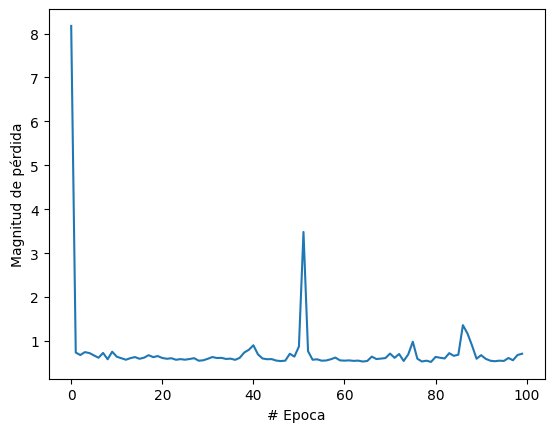

In [ ]:
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.plot(history.history['loss'])

In [ ]:
print('Hagamos una predicción')
resultado=model.predict([test_features.iloc[23,:].tolist()])
print('El resultado es', str(resultado), 'fahrenheit!')

Hagamos una predicción
1/1 [==============================] - 0s 120ms/step
El resultado es [[5.075397]] fahrenheit!


In [ ]:
test_features.head()

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual sugar,Chlorides,Free sulfur dioxide,Total sulfur dioxide,Density,pH,Sulphates,Alochol
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
23,8.5,0.49,0.11,2.3,0.084,9.0,67.0,0.9968,3.17,0.53,9.4
24,6.9,0.40,0.14,2.4,0.085,21.0,40.0,0.9968,3.43,0.63,9.7
25,6.3,0.39,0.16,1.4,0.080,11.0,23.0,0.9955,3.34,0.56,9.3
28,7.1,0.71,0.00,1.9,0.080,14.0,35.0,0.9972,3.47,0.55,9.4


In [ ]:
test_labels.head()

11    5
23    5
24    6
25    5
28    5
Name: Quality, dtype: int64

In [ ]:
test_labels.unique().tolist()

[5, 6, 4, 7, 8]

In [ ]:
print(dataset.iloc[23])

Fixed Acidity            8.5000
Volatile Acidity         0.4900
Citric Acid              0.1100
Residual sugar           2.3000
Chlorides                0.0840
Free sulfur dioxide      9.0000
Total sulfur dioxide    67.0000
Density                  0.9968
pH                       3.1700
Sulphates                0.5300
Alochol                  9.4000
Quality                  5.0000
Name: 23, dtype: float64


In [ ]:
dataset['Quality'].unique().tolist()

[5, 6, 7, 4, 8, 3]